In [ ]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
# fetch_openml - pobiera zbiory danych z otwartego repozytorium zbiorow danych


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print((np.array(mnist.data.loc[42]).reshape(28,28) > 0).astype(int))

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 

In [ ]:
# print(mnist.target[42]) # 7


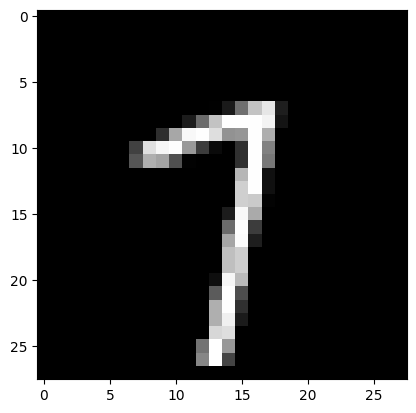

In [ ]:
pixels = np.array(mnist.data.loc[42]).reshape(28,28)
plt.imshow(pixels, cmap='gray')
plt.show()

In [ ]:
# 3
X, y = mnist["data"], mnist["target"].astype(np.uint8)
X.shape

(70000, 784)

In [ ]:
y.shape

(70000,)

In [ ]:
y_sorted = y.sort_values(ascending=True)
y_sorted.index


Index([34999, 56424, 56419, 16705, 56415, 56404, 56397, 56389, 56388, 56429,
       ...
       13698, 33531, 13695, 13692, 58898, 13687, 42651, 58914, 13678, 58529],
      dtype='int64', length=70000)

In [ ]:
y_sorted

,class
34999,0
56424,0
56419,0
16705,0
56415,0
...,...
13687,9
42651,9
58914,9
13678,9


In [ ]:
X_sorted = X.reindex(y_sorted.index)


In [ ]:
X_train_bad, X_test_bad = X_sorted[:56000], X_sorted[56000:]
y_train_bad, y_test_bad = y_sorted[:56000], y_sorted[56000:]
print(X_train_bad.shape)
print(y_train_bad.shape)
print(X_test_bad.shape)
print(y_test_bad.shape)


(56000, 784)
(56000,)
(14000, 784)
(14000,)


In [ ]:
print(np.unique(y_train_bad))
print(np.unique(y_test_bad))
# [0 1 2 3 4 5 6 7]
# [7 8 9]
# zbiory sa niepoprawne bo w zbiorze tranginowym nie ma zadnych 8 ani 9, nie nauczy sie model o nich nic
# testowy tez analogicznie niepoprawny

[0 1 2 3 4 5 6 7]
[7 8 9]


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(56000, 784)
(56000,)
(14000, 784)
(14000,)


In [ ]:
print(np.unique(y_train))
print(np.unique(y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [ ]:
# 4
y_train_0 = (y_train == 0)
y_test_0 = (y_test == 0)
print(y_train_0)
print(np.unique(y_train_0))
print(len(y_train_0))

47339    False
67456    False
12308    False
32557     True
664      False
         ...  
37194    False
6265     False
54886    False
860       True
15795     True
Name: class, Length: 56000, dtype: bool
[False  True]
56000


In [ ]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_0)


SGDClassifier(random_state=42)

In [ ]:
print(y_test.head(10))
print(sgd_clf.predict(X_test.head(10)))

46730    8
48393    4
41416    8
34506    7
43725    7
11615    0
24656    6
22411    2
936      7
56364    4
Name: class, dtype: uint8
[False False False False False  True False False False False]


In [ ]:
# dokladnosc
y_train_pred = sgd_clf.predict(X_train)
y_test_pred = sgd_clf.predict(X_test)

acc_train = sum(y_train_pred == y_train_0) / len(y_train_0)
acc_test = sum(y_test_pred == y_test_0) / len(y_test_0)

print(acc_train, acc_test)
# 0.9918571428571429 0.9903571428571428

acc_list = [acc_train, acc_test]

import pickle

with open("sgd_acc.pkl", "wb") as file1:  # wb - zapis w trybie binarnym
  pickle.dump(acc_list, file1)


0.9918571428571429 0.9903571428571428


In [ ]:
# 3-punktowa walidacja krzyzowa dokladnosci (accuracy)
from sklearn.model_selection import cross_val_score
score = cross_val_score(sgd_clf, X_train, y_train_0, cv=3, scoring="accuracy", n_jobs=-1)
# cv=3 - liczba k, model jest dzielony na 3 czesci, na dwoch trenuje i testuje na jednym, potem zamienia zestawy
# scoring="accuracy" - dokladnosc jako metryka oceny
# n=-1 - wykrozystuje wszystkei rdzenie procesora (przyspiesza to obliczenia)
print(score)
# [0.98687523 0.98762522 0.98649952]


[0.98687523 0.98762522 0.98649952]


In [ ]:
print(score.astype)

<built-in method astype of numpy.ndarray object at 0x7c529fcb0ff0>


In [ ]:
with open("sgd_cva.pkl", "wb") as file2:
  pickle.dump(score, file2)

In [ ]:
# 5
# klasyfikacja wieloklasowa
sgd_m_clf = SGDClassifier(random_state=42, n_jobs=-1)
sgd_m_clf.fit(X_train, y_train)

SGDClassifier(n_jobs=-1, random_state=42)

In [ ]:
print(y_test.head(10).values)
print(sgd_m_clf.predict(X_test.head(10)))

[8 4 8 7 7 0 6 2 7 4]
[8 4 5 7 7 0 6 2 7 7]


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict

# walidacja krzyzowa (dla siebie nie rtzeba w zadaniu)
y_train_pred_cross = cross_val_predict(sgd_m_clf, X_train, y_train, cv=3, n_jobs=-1)
conf_mx_cross = confusion_matrix(y_train, y_train_pred_cross)
print(conf_mx_cross)

[[5193    2   71   17   10   34   46    4  155   28]
 [   3 6121   49    9   14   17   20    8   30    6]
 [  42  109 4896  113   68   21   93   86  163   19]
 [  37   44  361 4312   26  497   28   86  224   93]
 [  15   31   49    2 5123    8   39   38   88  136]
 [  57   35   65  173  111 4069  127   36  298   69]
 [  56   33  204    3   66  122 4925    4   66    1]
 [  24   48   77   18  133   11    3 5225   44  207]
 [  47  216  705  130  133  446   77   68 3435  211]
 [  25   49   28   58  606   89    0  320  107 4256]]


In [ ]:
y_test_pred = sgd_m_clf.predict(X_test)
conf_mx = confusion_matrix(y_test, y_test_pred)
print(conf_mx)

[[1213    1   34    7    0   20   16    2   11   39]
 [   0 1565    6    6    2    7    2    2    3    7]
 [   0   18 1212   33    8   11   23   17   46   12]
 [   0    8   55 1205    0   67    5   15   16   62]
 [   0    5   32    5  919    9   18   41   39  227]
 [   3    8   18   41    5 1064   21    9   57   47]
 [   1    1   29    1    3   20 1327    4    7    3]
 [   3    3   22    5    4    5    0 1411    1   49]
 [   2   21   27   60    3   58   25   10 1009  142]
 [   1    6   14   12    8    2    1   85   12 1279]]


In [ ]:
print(conf_mx.astype)
print(conf_mx.shape)

print(conf_mx_cross.astype)
print(conf_mx_cross.shape)

<built-in method astype of numpy.ndarray object at 0x7c529fcb0690>
(10, 10)
<built-in method astype of numpy.ndarray object at 0x7c529fcb07b0>
(10, 10)


In [ ]:
with open("sgd_cmx.pkl", "wb") as file3:
  pickle.dump(conf_mx, file3)